# **HOUSE PRICE PREDICTION**
__________________________________________


## Objective

A home market is any market for properties that are negotiated directly between its owners and buyers, or via the services of real estate agents. Individuals and businesses are lured to this industry because it offers several profit potential as a result of global housing demand. Many variables influence these needs, including population, the economics, and politics. As a result, analysing such markets has proven difficult for data scientists and ML engineers throughout the world, since they must consider a wide variety of scientific fields, each addressing distinct types of data, in order to provide reliable findings to consumers and stakeholders. Many nowadays choose to buy houses via real estate agents. The price lists of various agencies varies. Consumers and agencies alike find it difficult to agree on an appropriate price for a home. Forecasting house prices is an essential aspect of real estate. The literature seeks to glean meaningful knowledge from historical property market data. In India, machine learning techniques are used to evaluate previous property transactions in order to identify beneficial models for home buyers and sellers.

## Data Source

KAGGLE : /kaggle/input/mumbai-house-price-prediction/Mumbai_NEW.csv

## Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt


## Import data

In [ ]:
data = pd.read_csv("/Hemali Patel_dataset_G27.csv")

## Describe Data

In [ ]:
data.describe()

## Data Preprocessing

In [ ]:
data1 = data.drop(['Unnamed: 0'], axis = 'columns')
data1.describe()

In [ ]:
data1.isnull().sum()

Price                    0
Area                     0
Location                 0
No. of Bedrooms         26
New/Resale               0
Gymnasium                0
Lift Available           0
Car Parking              0
Maintenance Staff       14
24x7 Security            0
Children's Play Area     0
Clubhouse                0
Intercom                 0
Landscaped Gardens       0
Indoor Games             0
Gas Connection           0
Jogging Track            0
Swimming Pool            0
dtype: int64

In [ ]:
data2 = data1.dropna()
data2.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 1959 non-null   int64  
 1   Area                  1959 non-null   int64  
 2   Location              1959 non-null   object 
 3   No. of Bedrooms       1959 non-null   float64
 4   New/Resale            1959 non-null   int64  
 5   Gymnasium             1959 non-null   int64  
 6   Lift Available        1959 non-null   int64  
 7   Car Parking           1959 non-null   int64  
 8   Maintenance Staff     1959 non-null   float64
 9   24x7 Security         1959 non-null   int64  
 10  Children's Play Area  1959 non-null   int64  
 11  Clubhouse             1959 non-null   int64  
 12  Intercom              1959 non-null   int64  
 13  Landscaped Gardens    1959 non-null   int64  
 14  Indoor Games          1959 non-null   int64  
 15  Gas Connection       

In [ ]:
data2.Location.value_counts()

Kharghar                   330
Kamothe                     69
Thane West                  52
Ulwe                        48
Mira Road East              47
                          ... 
Sector-26 Taloja             1
Koproli                      1
Sector13 Kharghar            1
Palghar                      1
Kolshet Industrial Area      1
Name: Location, Length: 354, dtype: int64

In [ ]:
data2.shape

(1959, 18)

## Data visualization

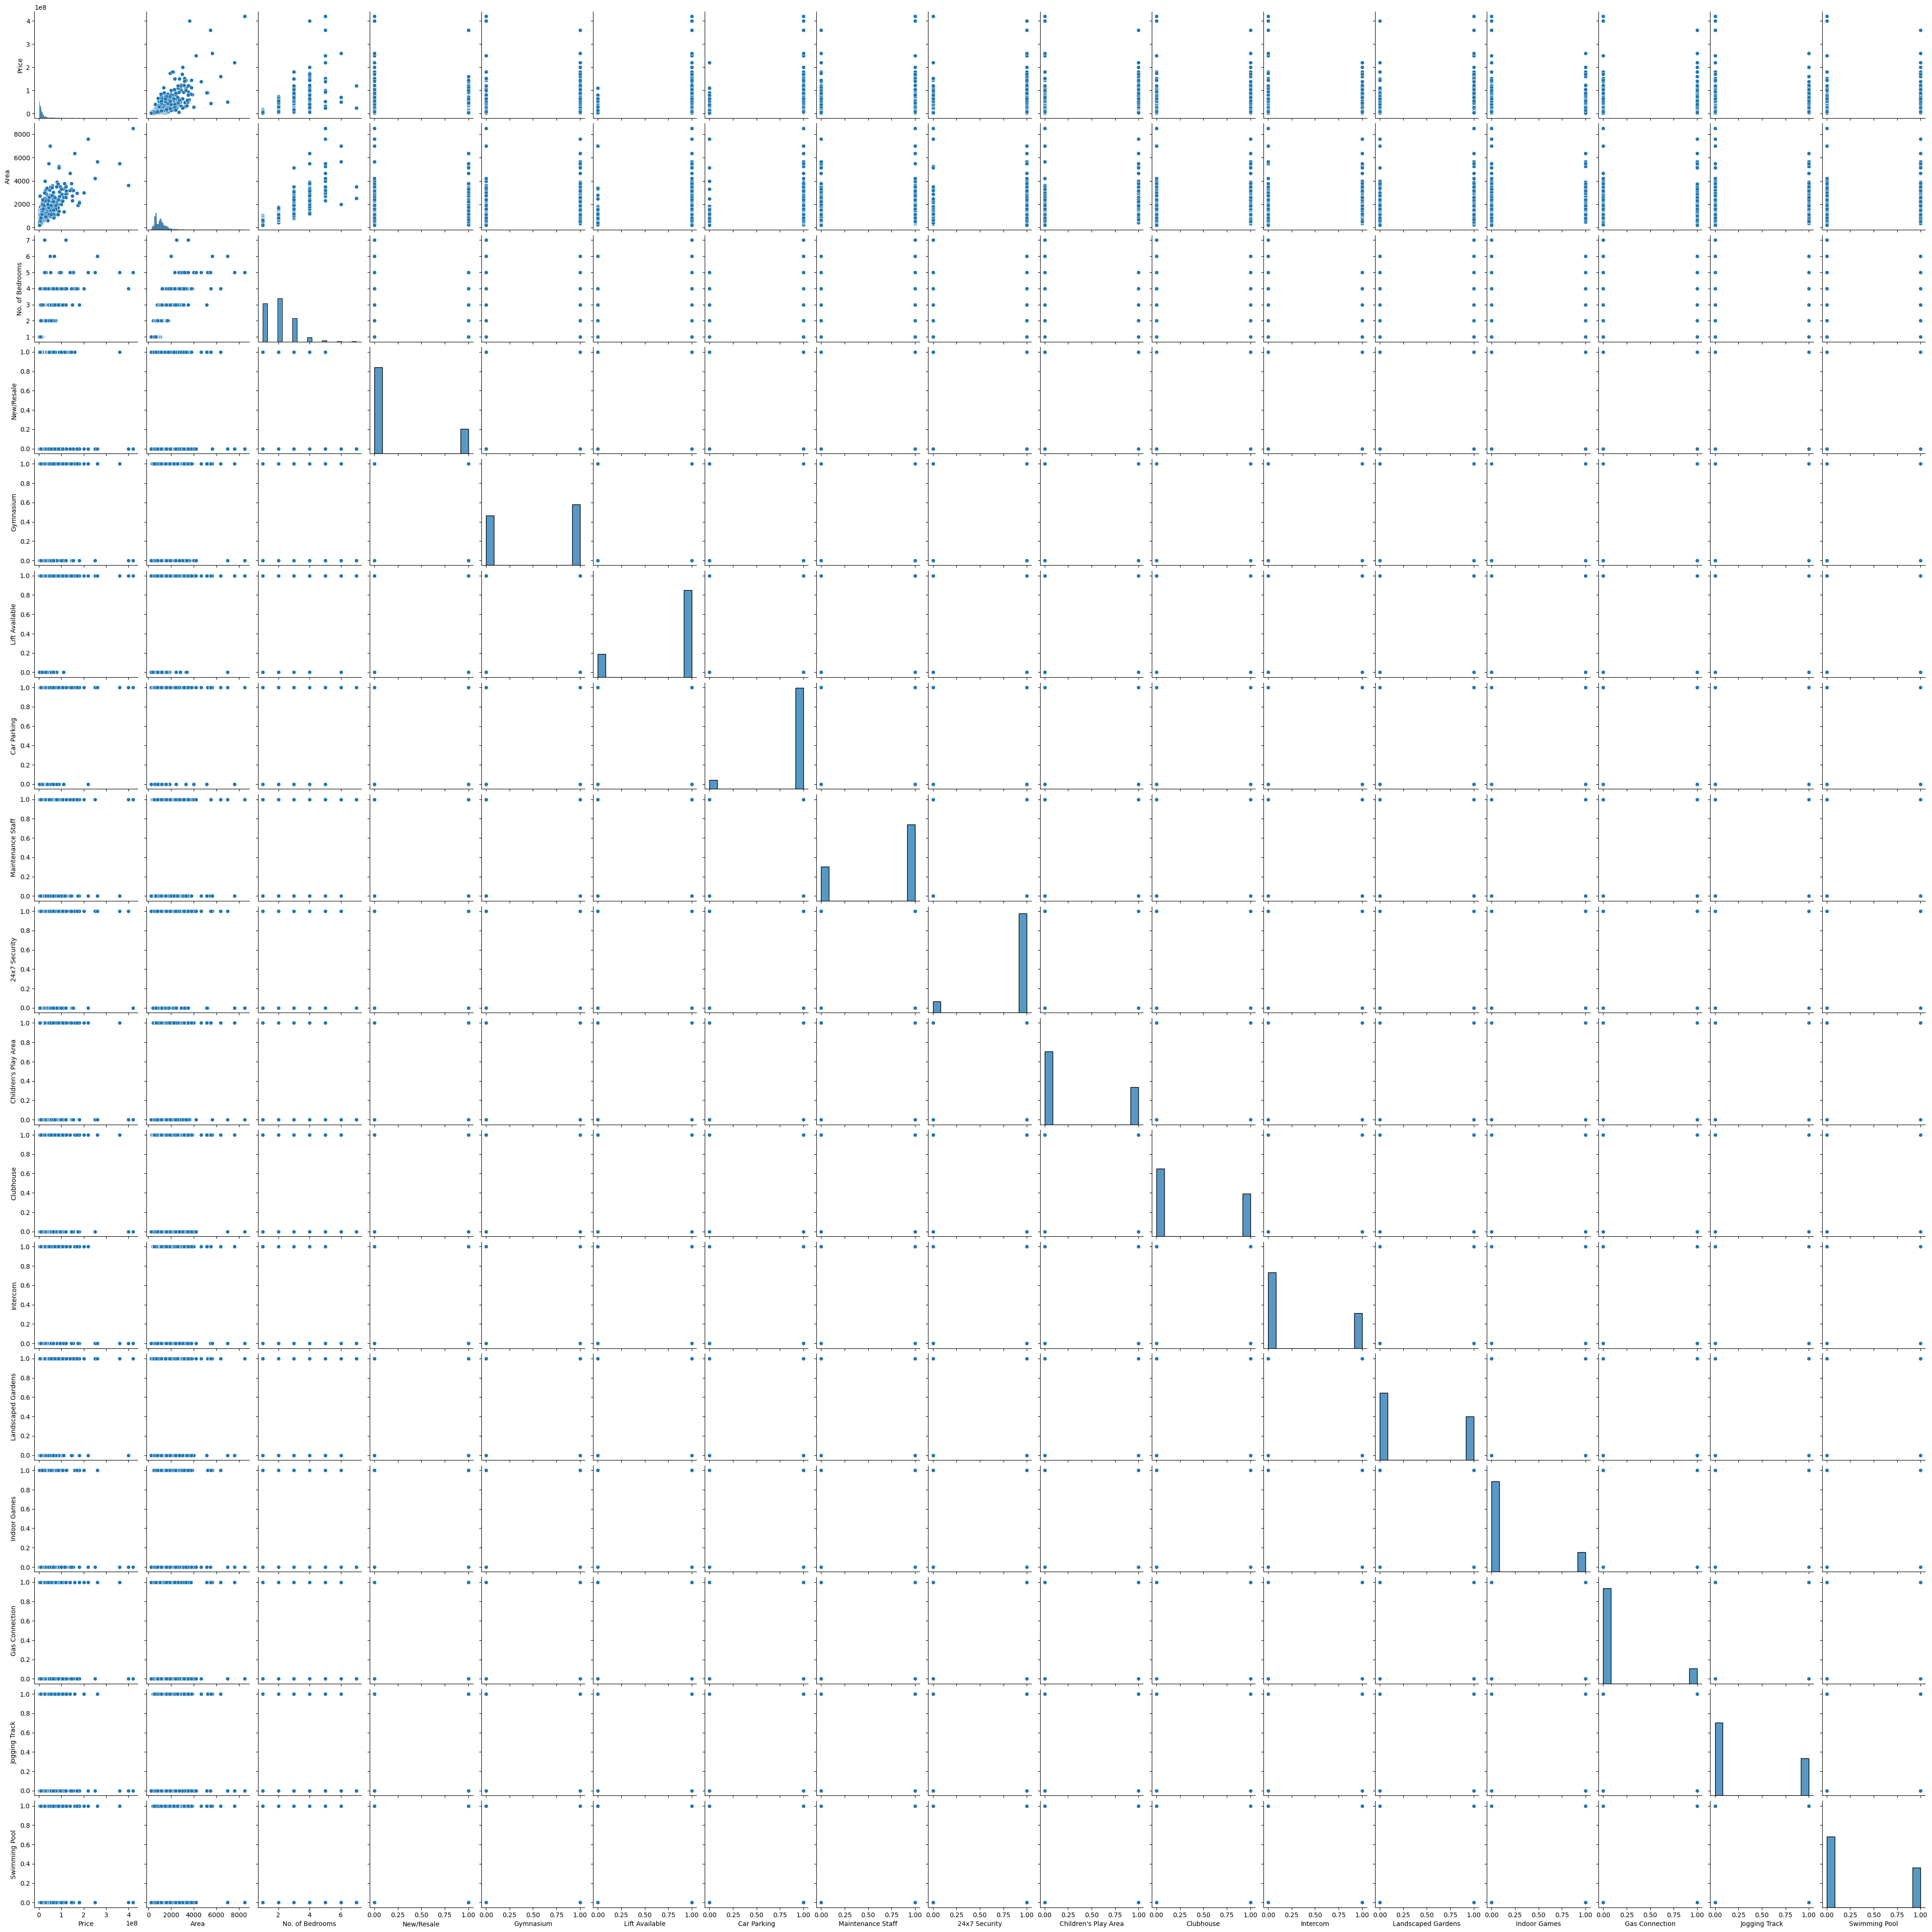

In [ ]:
sns.pairplot(data2)

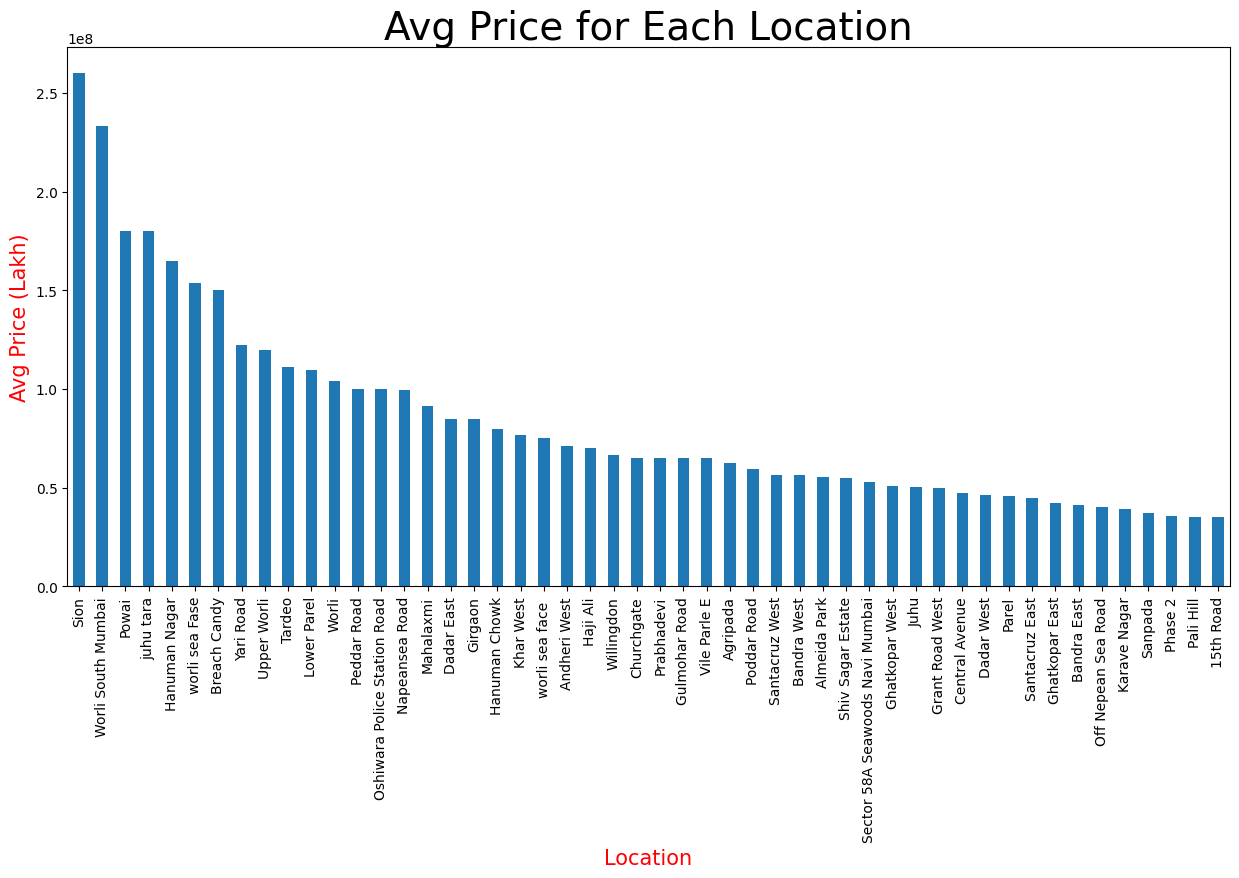

In [ ]:
plt.figure(figsize=(15,7))
data2.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

<ipython-input-18-35f56ef2dd18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr())


<Axes: >

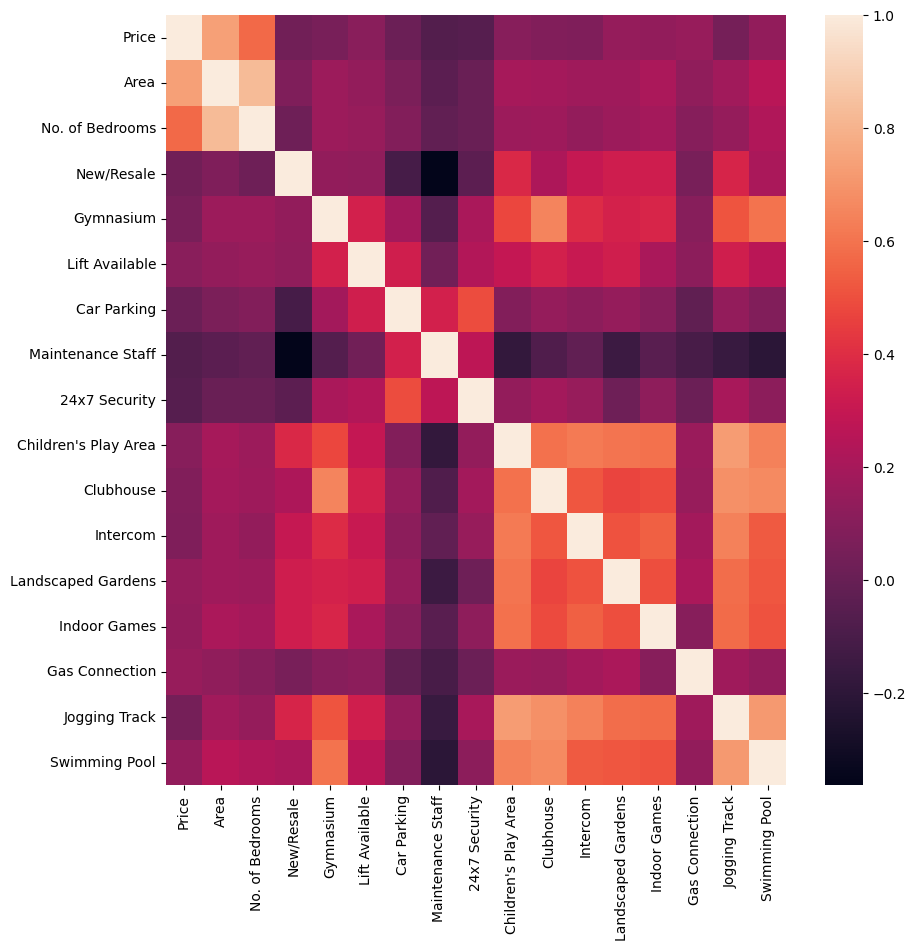

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr())

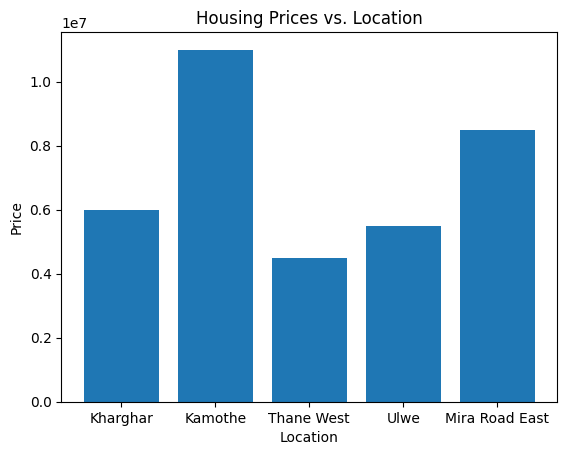

In [ ]:
# Extract location and price columns
location = ['Kharghar', 'Kamothe', 'Thane West', 'Ulwe', 'Mira Road East']
price = [6000000, 11000000, 4500000, 5500000, 8500000]

# Create scatter plot
plt.bar(location, price)
plt.title('Housing Prices vs. Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

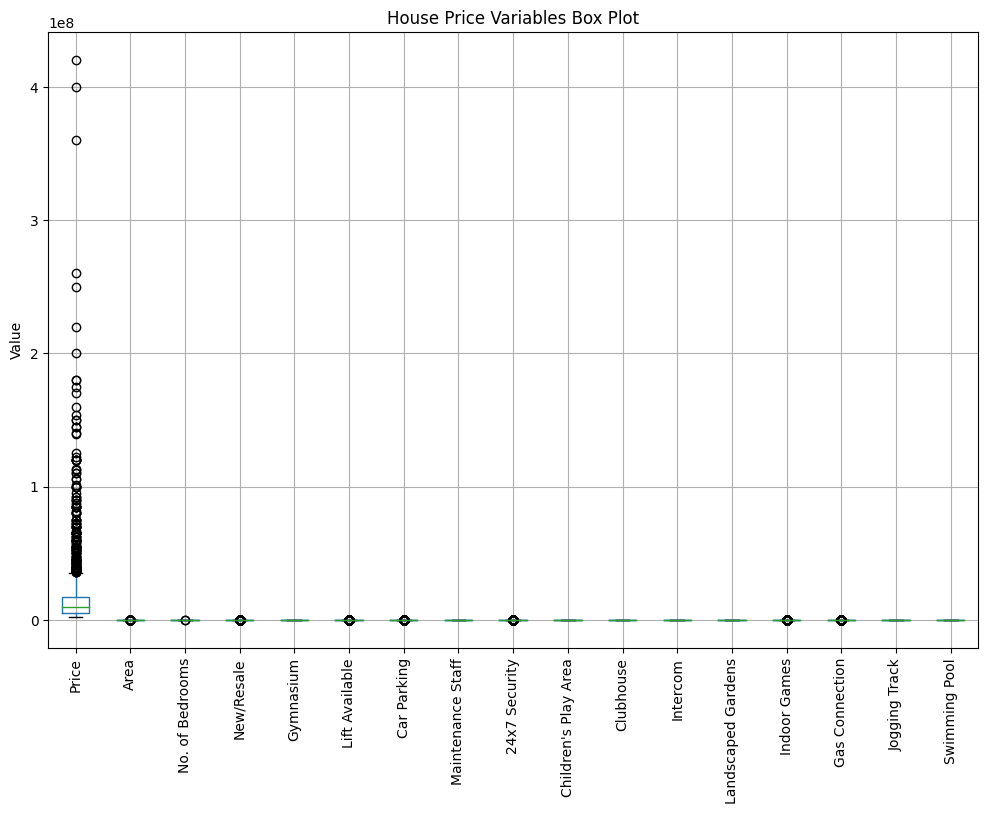

In [ ]:

# Select the columns to include in the box plot
columns = ['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
           'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
           "Children's Play Area", 'Clubhouse', 'Intercom', 'Landscaped Gardens',
           'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool']

# Create a box plot for each column
plt.figure(figsize=(12,8))
data2[columns].boxplot()
plt.xticks(rotation=90)
plt.title('House Price Variables Box Plot')
plt.ylabel('Value')
plt.show()

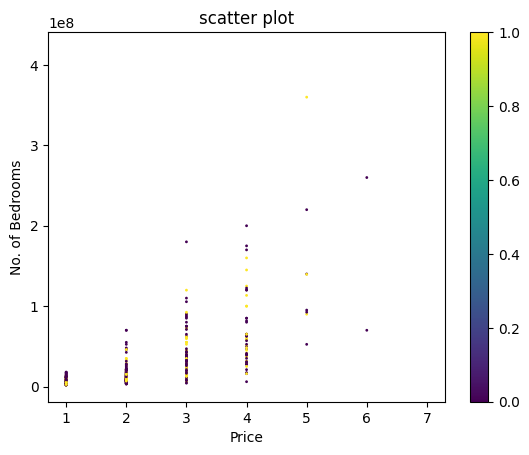

In [ ]:

plt.scatter(data2['No. of Bedrooms'],data2['Price'] , c= data2['New/Resale'] , s= data2['Gymnasium'])


plt.title("scatter plot")


plt.ylabel('No. of Bedrooms')
plt.xlabel('Price')


plt.colorbar()


plt.show()

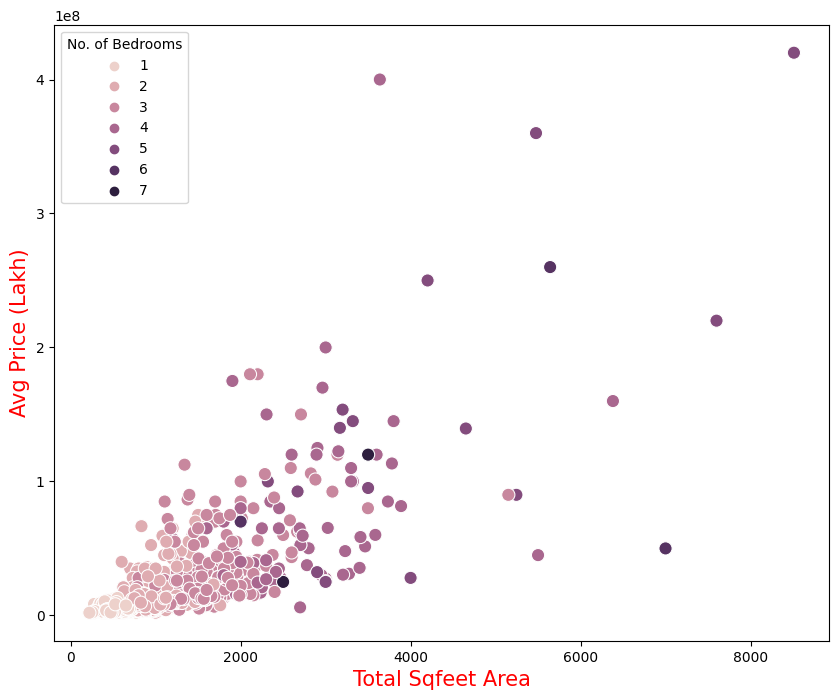

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Area',y='Price',data=data2,hue='No. of Bedrooms',s=90)
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

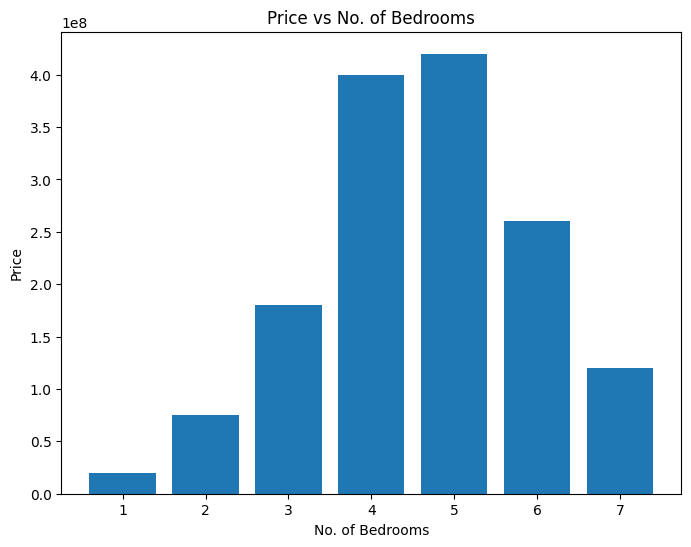

In [ ]:

# select the columns to include in the bar graph
columns = ['Price', 'No. of Bedrooms']

# create a grouped bar graph using matplotlib
plt.figure(figsize=(8,6))
plt.bar(data2[columns[1]], data2[columns[0]])
plt.title('Price vs No. of Bedrooms')
plt.xlabel(columns[1])
plt.ylabel(columns[0])
plt.show()

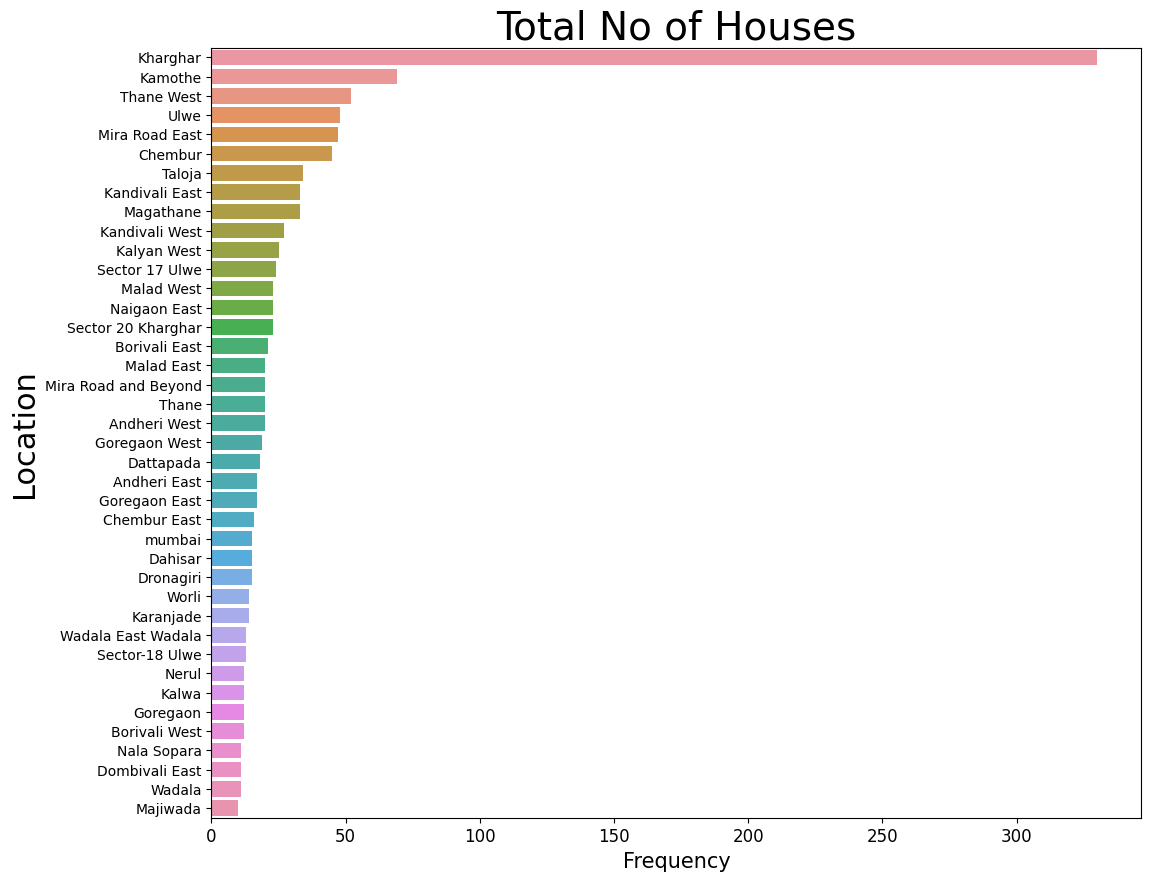

In [ ]:
plt.figure(figsize=(12,10))
most_cat = data2['Location'].value_counts()[:40]
sns.barplot(x=most_cat, y=most_cat.index, data=data2)
plt.xticks(size=12)
plt.xlabel("Frequency",size=15)
plt.ylabel("Location",size=22)
plt.title("Total No of Houses",size=28)
plt.show()

In [ ]:
data3=data2.drop(["Children's Play Area",'Gas Connection','Jogging Track','Intercom','Clubhouse','Gymnasium','Indoor Games',],axis=1)
data3['Price_per_sqft'] = data3['Price']/data3['Area']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data3['Location']= label_encoder.fit_transform(data3['Location'])

In [ ]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
data3 = removeOutliners(data3)
data3.shape

(820, 12)

## Define target variable(y) and feature variables(x)

In [ ]:
X=data3.drop(columns=['Price'],axis=1)
Y=data3['Price']

## Train test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(820, 11) (574, 11) (246, 11)
(820,) (574,) (246,)


## Modeling and Model Evaluation

Linear Regression:

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 85.26787594026118
MAE: 3021353.3716969765
MSE: 25847777862863.242
RMSE: 5084070.993098271


Logistic Regression:

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)

LR_prediction = lr_clf.predict(X_test)

# Since Logistic Regression is a classification algorithm, we'll use accuracy instead of R2 Score.
accuracy = accuracy_score(Y_test, LR_prediction)
print('Accuracy:', accuracy * 100)

# For classification tasks, you can use other metrics like precision, recall, F1-score, etc.
# If you want the confusion matrix as well:
conf_matrix = confusion_matrix(Y_test, LR_prediction)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.6260162601626018
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree:

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)


DT_prediction=DT.predict(X_test)
print('R2 Score :',r2_score(DT_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(DT_prediction,Y_test))
print('MSE:',mean_squared_error(DT_prediction,Y_test))
rmse = sqrt(mean_squared_error(DT_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 90.20348029145595
MAE: 1275739.8414634147
MSE: 22037245941292.72
RMSE: 4694384.5114447875


Neural Networks:

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test set
NN_prediction = nn_model.predict(X_test).flatten()

# Calculate evaluation metrics
r2_score_nn = r2_score(Y_test, NN_prediction)
mae_nn = mean_absolute_error(Y_test, NN_prediction)
mse_nn = mean_squared_error(Y_test, NN_prediction)
rmse_nn = sqrt(mse_nn)

# Print the evaluation metrics
print('R2 Score:', r2_score_nn * 100)
print('MAE:', mae_nn)
print('MSE:', mse_nn)
print('RMSE:', rmse_nn)

8/8 [==============================] - 0s 2ms/step
R2 Score: 60.17255691937733
MAE: 5035907.636178861
MSE: 81251435838401.45
RMSE: 9013957.834292406


Random Forest:

In [ ]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RF_prediction=RF.predict(X_test)
print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,Y_test))
print('MSE:',mean_squared_error(RF_prediction,Y_test))
rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
print('RMSE:',rmse)

RF.score(X_test,Y_test)

R2 Score : 96.77555027422171
MAE: 672012.6486991871
MSE: 5362319501910.645
RMSE: 2315668.262491552


0.9737152368399721

## Model Evaluation

In [ ]:
pd.DataFrame(data={'Actual':Y_test,'Predicted':RF_prediction}).head()

,Actual,Predicted
190,5700000,5585820.00
601,19000000,18874000.00
242,21000000,21120999.99
413,15500000,13636999.99
372,9400000,9428750.00


import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4696536893023628206, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4696536893023628206, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4696536893023628206, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4696536893023628206, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4696536893023628206, *[[['Actual', 'Predicted']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4696536893023628206, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4696536893023628206, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4696536893023628206, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4696536893023628206, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4696536893023628206 = autoviz.get_df('df_4696536893023628206')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4696536893023628206, *[[['Actual', 'Predicted']]], **{})
chart

## Prediction

In [ ]:
Input_data=np.array([[1000,3,2.0,1,1,1,0.0,0,0,0,1369.875686]])
Predictive_system=lr_clf.predict(Input_data)
print(Predictive_system)

[16000000]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Explaination

By Random Forest regression we get almost 96 % of accuracy.and we can clearly say random forest is performing well in this scenario.